In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/datasets/tower.csv')
df2 = pd.read_csv('/content/drive/MyDrive/datasets/MyCall_Data_September_2019.csv')
weather = pd.read_csv('/content/drive/MyDrive/datasets/weather.csv')

In [ ]:
df1['Start_Time_MM_DD_YYYY'] = pd.to_datetime(df1.Start_Time_MM_DD_YYYY , format = '%Y%m%d')
df1

,outgoing_site_id,Start_Time_MM_DD_YYYY,Total Calls,Traffic,lat,long,Call Dropped
0,1717.0,2017-01-01,499.0,Low,40.710567,-74.007338,16.0
1,1717.0,2017-01-01,554.0,Medium,40.710567,-74.007338,44.0
2,1717.0,2017-01-01,301.0,Low,40.710567,-74.007338,17.0
3,1717.0,2017-01-01,514.0,Low,40.710567,-74.007338,16.0
4,1717.0,2017-01-01,262.0,Low,40.710567,-74.007338,14.0
...,...,...,...,...,...,...,...
6151,63383.0,2017-01-30,551.0,Medium,40.713303,-74.002643,43.0
6152,63383.0,2017-01-31,350.0,High,40.713303,-74.002643,64.0
6153,63383.0,2017-01-31,627.0,Medium,40.713303,-74.002643,47.0
6154,63383.0,2017-01-31,369.0,Medium,40.713303,-74.002643,50.0


In [ ]:
df1.shape

(6156, 7)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6156 entries, 0 to 6155
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   outgoing_site_id       4326 non-null   float64       
 1   Start_Time_MM_DD_YYYY  4326 non-null   datetime64[ns]
 2   Total Calls            4326 non-null   float64       
 3   Traffic                4326 non-null   object        
 4   lat                    4326 non-null   float64       
 5   long                   4326 non-null   float64       
 6   Call Dropped           4326 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 336.8+ KB


In [ ]:
df1 = df1.dropna()
df1.shape

(4326, 7)

In [ ]:
df1.columns

Index(['outgoing_site_id', 'Start_Time_MM_DD_YYYY', 'Total Calls', 'Traffic',
       'lat', 'long', 'Call Dropped'],
      dtype='object')

In [ ]:
df1['outgoing_site_id'].unique().shape

(6,)

In [ ]:
site_id = df1.groupby('outgoing_site_id')
site_id.first()

,Start_Time_MM_DD_YYYY,Total Calls,Traffic,lat,long,Call Dropped
outgoing_site_id,,,,,,
1717.0,2017-01-01,499.0,Low,40.710567,-74.007338,16.0
3066.0,2017-01-01,419.0,Low,40.712100,-74.005152,18.0
21106.0,2017-01-01,400.0,Medium,40.711376,-74.005152,26.0
30178.0,2017-01-01,395.0,Medium,40.712970,-74.003983,46.0
57151.0,2017-01-01,322.0,Medium,40.713328,-74.006911,36.0
63383.0,2017-01-01,455.0,High,40.713303,-74.002643,63.0


In [ ]:
site_id['outgoing_site_id'].unique()

outgoing_site_id
1717.0      [1717.0]
3066.0      [3066.0]
21106.0    [21106.0]
30178.0    [30178.0]
57151.0    [57151.0]
63383.0    [63383.0]
Name: outgoing_site_id, dtype: object

In [ ]:
print ( type ( site_id )  ) 

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [ ]:
site_id.get_group(1717.0)

,outgoing_site_id,Start_Time_MM_DD_YYYY,Total Calls,Traffic,lat,long,Call Dropped
0,1717.0,2017-01-01,499.0,Low,40.710567,-74.007338,16.0
1,1717.0,2017-01-01,554.0,Medium,40.710567,-74.007338,44.0
2,1717.0,2017-01-01,301.0,Low,40.710567,-74.007338,17.0
3,1717.0,2017-01-01,514.0,Low,40.710567,-74.007338,16.0
4,1717.0,2017-01-01,262.0,Low,40.710567,-74.007338,14.0
...,...,...,...,...,...,...,...
94,1717.0,2017-01-18,610.0,Low,40.710567,-74.007338,19.0
95,1717.0,2017-01-19,532.0,High,40.710567,-74.007338,54.0
96,1717.0,2017-01-19,548.0,High,40.710567,-74.007338,59.0
97,1717.0,2017-01-19,448.0,Medium,40.710567,-74.007338,26.0


In [ ]:
#site_id = df1.groupby('outgoing_site_id').aggregate('Total Calls' )
site_id = df1.groupby('outgoing_site_id').sum( ['Total Calls', 'Call Dropped'] )
site_id = site_id[['Total Calls', 'Call Dropped']]
#.sum( ['Total Calls', 'Call Dropped'] )
site_id

,Total Calls,Call Dropped
outgoing_site_id,,
1717.0,45129.0,3761.0
3066.0,53364.0,4696.0
21106.0,461502.0,39402.0
30178.0,449928.0,39384.0
57151.0,456348.0,39618.0
63383.0,450096.0,39852.0


In [ ]:
#site_id [ site_id['outgoing_site_id	'] == 1717.0 ] 
site_id['Call Drop Percentage'] = site_id['Call Dropped']/ site_id['Total Calls']

In [ ]:
site_id

,Total Calls,Call Dropped,Call Drop Percentage
outgoing_site_id,,,
1717.0,45129.0,3761.0,0.083339
3066.0,53364.0,4696.0,0.087999
21106.0,461502.0,39402.0,0.085378
30178.0,449928.0,39384.0,0.087534
57151.0,456348.0,39618.0,0.086815
63383.0,450096.0,39852.0,0.088541


In [ ]:
site_id.index

Float64Index([1717.0, 3066.0, 21106.0, 30178.0, 57151.0, 63383.0], dtype='float64', name='outgoing_site_id')

In [ ]:
site_id['tower_id'] = site_id.index
site_id.index = range(0,6)
site_id

,Total Calls,Call Dropped,Call Drop Percentage,tower_id
0,45129.0,3761.0,0.083339,1717.0
1,53364.0,4696.0,0.087999,3066.0
2,461502.0,39402.0,0.085378,21106.0
3,449928.0,39384.0,0.087534,30178.0
4,456348.0,39618.0,0.086815,57151.0
5,450096.0,39852.0,0.088541,63383.0


In [ ]:
temp = ['total_calls', 'call_dropped', 'call_drop_per', 'tower_id']
site_id.columns = temp
site_id


,total_calls,call_dropped,call_drop_per,tower_id
0,45129.0,3761.0,0.083339,1717.0
1,53364.0,4696.0,0.087999,3066.0
2,461502.0,39402.0,0.085378,21106.0
3,449928.0,39384.0,0.087534,30178.0
4,456348.0,39618.0,0.086815,57151.0
5,450096.0,39852.0,0.088541,63383.0


In [ ]:
df = site_id

In [ ]:
x = df[df['call_drop_per']==df['call_drop_per'].max()][ ['call_drop_per', 'tower_id'] ]
x

,call_drop_per,tower_id
5,0.088541,63383.0


So tower_id 63383.0 has highest call drop percentage

In [ ]:
plt.bar(x_axis, total_calls, color='r' )
plt.bar(x_axis, call_dropped, bottom=call_dropped, color='b')
plt.xlabel('Tower Id')
plt.ylabel('Total calls')

plt.show()


NameError: ignored

In [ ]:
temp1 = df1[['outgoing_site_id', 'lat', 'long'] ].drop_duplicates()
temp1

,outgoing_site_id,lat,long
0,1717.0,40.710567,-74.007338
1026,3066.0,40.712100,-74.005152
2052,21106.0,40.711376,-74.005152
3078,30178.0,40.712970,-74.003983
4104,57151.0,40.713328,-74.006911
5130,63383.0,40.713303,-74.002643


In [ ]:
import plotly.express as px
import pandas as pd
fig = px.scatter_geo(temp1,lat='lat',lon='long', hover_name="outgoing_site_id")
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()


In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 14.0 MB/s 
     |████████████████████████████████| 16.7 MB 55.1 MB/s 
     |████████████████████████████████| 6.3 MB 44.4 MB/s 


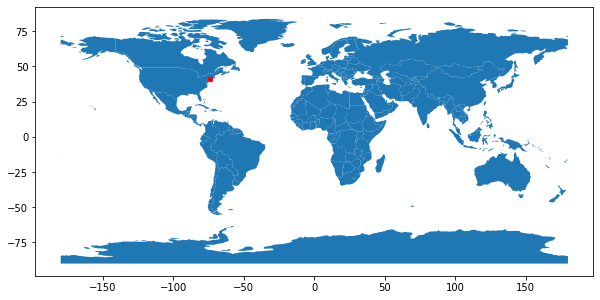

In [ ]:
import pandas as pd

import geopandas as gpd
from geopandas import GeoDataFrame



#geometry = [Point(xy) for xy in zip(temp1['long'], temp1['lat'])]
#gdf = GeoDataFrame(temp1, geometry=geometry)   
gdf = gpd.GeoDataFrame(temp1, geometry= gpd.points_from_xy(temp1['long'], temp1['lat']))



#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);


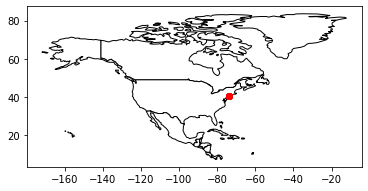

In [ ]:
ax = world[world.continent == 'North America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()


In [ ]:
df1.columns

Index(['outgoing_site_id', 'Start_Time_MM_DD_YYYY', 'Total Calls', 'Traffic',
       'lat', 'long', 'Call Dropped'],
      dtype='object')

In [ ]:
df2 = df1
df2 = df2.rename( columns = {'Start_Time_MM_DD_YYYY': 'date', 'outgoing_site_id': 'towerId', 'Total Calls': 'totalCalls',
                             'Traffic': 'traffic', 'Call Dropped': 'callDropped'})
df2

,towerId,date,totalCalls,traffic,lat,long,callDropped
0,1717.0,2017-01-01,499.0,Low,40.710567,-74.007338,16.0
1,1717.0,2017-01-01,554.0,Medium,40.710567,-74.007338,44.0
2,1717.0,2017-01-01,301.0,Low,40.710567,-74.007338,17.0
3,1717.0,2017-01-01,514.0,Low,40.710567,-74.007338,16.0
4,1717.0,2017-01-01,262.0,Low,40.710567,-74.007338,14.0
...,...,...,...,...,...,...,...
6151,63383.0,2017-01-30,551.0,Medium,40.713303,-74.002643,43.0
6152,63383.0,2017-01-31,350.0,High,40.713303,-74.002643,64.0
6153,63383.0,2017-01-31,627.0,Medium,40.713303,-74.002643,47.0
6154,63383.0,2017-01-31,369.0,Medium,40.713303,-74.002643,50.0


In [ ]:
df2['traffic'].replace(['Low', 'Medium', 'High'],[0, 1, 2], inplace=True)
df2

,towerId,date,totalCalls,traffic,lat,long,callDropped
0,1717.0,2017-01-01,499.0,0,40.710567,-74.007338,16.0
1,1717.0,2017-01-01,554.0,1,40.710567,-74.007338,44.0
2,1717.0,2017-01-01,301.0,0,40.710567,-74.007338,17.0
3,1717.0,2017-01-01,514.0,0,40.710567,-74.007338,16.0
4,1717.0,2017-01-01,262.0,0,40.710567,-74.007338,14.0
...,...,...,...,...,...,...,...
6151,63383.0,2017-01-30,551.0,1,40.713303,-74.002643,43.0
6152,63383.0,2017-01-31,350.0,2,40.713303,-74.002643,64.0
6153,63383.0,2017-01-31,627.0,1,40.713303,-74.002643,47.0
6154,63383.0,2017-01-31,369.0,1,40.713303,-74.002643,50.0


In [ ]:
df2['callDropPer'] = df2['callDropped']/df2['totalCalls']
df2

,towerId,date,totalCalls,traffic,lat,long,callDropped,callDropPer
0,1717.0,2017-01-01,499.0,0,40.710567,-74.007338,16.0,0.032064
1,1717.0,2017-01-01,554.0,1,40.710567,-74.007338,44.0,0.079422
2,1717.0,2017-01-01,301.0,0,40.710567,-74.007338,17.0,0.056478
3,1717.0,2017-01-01,514.0,0,40.710567,-74.007338,16.0,0.031128
4,1717.0,2017-01-01,262.0,0,40.710567,-74.007338,14.0,0.053435
...,...,...,...,...,...,...,...,...
6151,63383.0,2017-01-30,551.0,1,40.713303,-74.002643,43.0,0.078040
6152,63383.0,2017-01-31,350.0,2,40.713303,-74.002643,64.0,0.182857
6153,63383.0,2017-01-31,627.0,1,40.713303,-74.002643,47.0,0.074960
6154,63383.0,2017-01-31,369.0,1,40.713303,-74.002643,50.0,0.135501


# Logistic Regression

In [ ]:
feature_cols = ['towerId', 'totalCalls', 'callDropped', 'callDropPer']
X = df2[feature_cols]
y = df2['traffic']

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=400)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)


In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[215,  63,   0],
       [ 30, 387,  87],
       [  0, 109, 191]])

Text(0.5, 257.44, 'Predicted label')

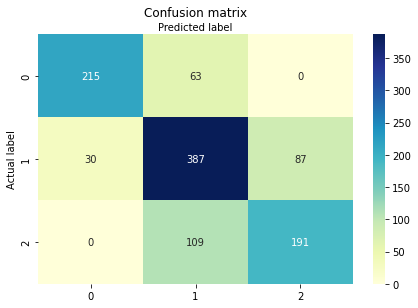

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1, 2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.732902033271719


# Random Forest




In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))



ACCURACY OF THE MODEL:  1.0


In [ ]:
clf.predict([[3, 3, 2, 2]])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array([0])